## Insight 3
### ¿Cuál es la evolución del índice de letalidad del Covid-19 en **Colombia** y **Argentina** comparado con los paises con los índices históricos más elevados?

### Importamos librerías

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Importamos los datos 

In [3]:
df_covid_limpio = pd.read_csv('covid_clean.csv', sep=';')

### Verificamos las estructuras de datos

In [4]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      48902 non-null  object 
 1   Country_code       48902 non-null  object 
 2   Country            48902 non-null  object 
 3   New_cases          48902 non-null  int64  
 4   Cumulative_cases   48902 non-null  int64  
 5   New_deaths         48902 non-null  int64  
 6   Cumulative_deaths  48902 non-null  int64  
 7   lethality_rate     48902 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 3.0+ MB


Convertimos Date_reported a DateTime

In [5]:
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'])
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48902 entries, 0 to 48901
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_reported      48902 non-null  datetime64[ns]
 1   Country_code       48902 non-null  object        
 2   Country            48902 non-null  object        
 3   New_cases          48902 non-null  int64         
 4   Cumulative_cases   48902 non-null  int64         
 5   New_deaths         48902 non-null  int64         
 6   Cumulative_deaths  48902 non-null  int64         
 7   lethality_rate     48902 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


## Insight y Conclusión

In [6]:
#Lethality Rate by Country
def get_max_row(group, column):
    return group.loc[group[column].idxmax()]

result = df_covid_limpio.groupby(['Country', df_covid_limpio['Date_reported'].dt.to_period("M")]).apply(lambda group: get_max_row(group, 'lethality_rate'))
result.reset_index(drop=True, inplace=True)
top_4_paises = result.groupby('Country')['lethality_rate'].mean().nlargest(4).index
result = result[result['Country'].isin(top_4_paises)]
#Colombia
result_pais_Col = df_covid_limpio[df_covid_limpio['Country'] == 'Colombia'].groupby(df_covid_limpio['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
result_pais_Col.reset_index(drop=True, inplace=True)
#Argentina
result_pais_Arg = df_covid_limpio[df_covid_limpio['Country'] == 'Argentina'].groupby(df_covid_limpio['Date_reported'].dt.to_period("M")).apply(lambda group: get_max_row(group, 'lethality_rate'))
result_pais_Arg.reset_index(drop=True, inplace=True)
#Final
result_final = pd.concat([result, result_pais_Col,result_pais_Arg])
#Argentina Colombia
result_ARG_COL = pd.concat([result_pais_Arg,result_pais_Col])
result_ARG_COL

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2020-01-05,AR,Argentina,0,0,0,0,0.000000
1,2020-02-02,AR,Argentina,0,0,0,0,0.000000
2,2020-03-15,AR,Argentina,109,131,8,9,6.870229
3,2020-04-26,AR,Argentina,1398,5464,132,411,7.521962
4,2020-05-03,AR,Argentina,1289,6753,115,526,7.789131
...,...,...,...,...,...,...,...,...
44,2023-09-03,CO,Colombia,562,6379641,0,142727,2.237226
45,2023-10-01,CO,Colombia,340,6381362,0,142727,2.236623
46,2023-11-05,CO,Colombia,291,6382983,0,142727,2.236055
47,2023-12-03,CO,Colombia,276,6384224,0,142727,2.235620


In [7]:
y = result_ARG_COL.groupby('Country').agg('max')['lethality_rate']

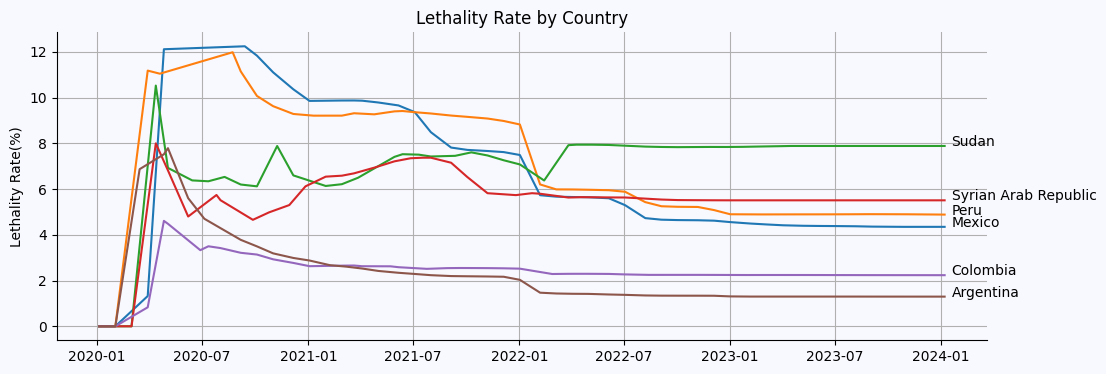

In [8]:
plt.rcParams["axes.facecolor"] = "#F8F8FF"
fig, ax = plt.subplots(figsize=(12, 4),facecolor='#F8F8FF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for pais in result_final['Country'].unique():
    country_data = result_final[result_final['Country'] == pais]
    line, = ax.plot(country_data['Date_reported'], country_data['lethality_rate'], label=pais)
    ax.annotate(pais, (country_data['Date_reported'].iloc[-1],country_data['lethality_rate'].iloc[-1]), xytext=(5,0), textcoords='offset points', ha='left')
plt.grid()
plt.title('Lethality Rate by Country')
plt.ylabel('Lethality Rate(%)')

plt.show()


7.789130756700725
4.609711124769515


Text(0.1, 0.96, '7.79%')

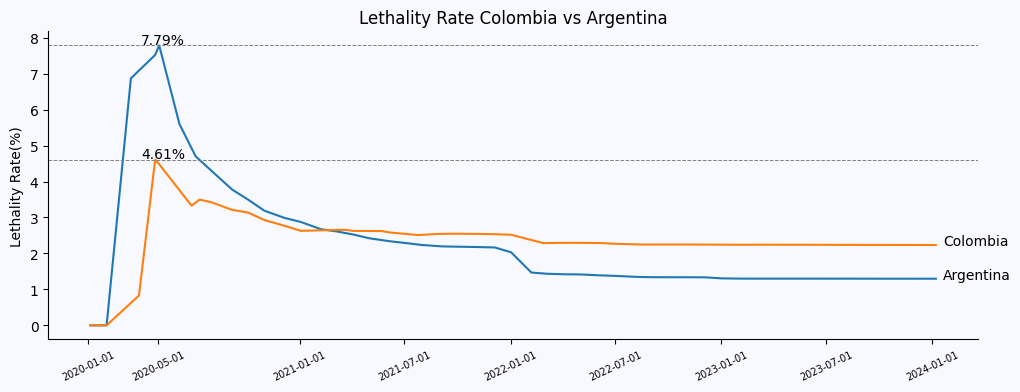

In [9]:
#Argentina vs Colombia
plt.rcParams["axes.facecolor"] = "#F8F8FF"
fig, ax = plt.subplots(figsize=(12, 4),facecolor='#F8F8FF')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for pais in result_ARG_COL['Country'].unique():
    country_data = result_ARG_COL[result_ARG_COL['Country'] == pais]
    ax.plot(country_data['Date_reported'], country_data['lethality_rate'])
    print(country_data['lethality_rate'].max())
    ax.annotate(pais, (country_data['Date_reported'].iloc[-1],country_data['lethality_rate'].iloc[-1]), xytext=(5,0), textcoords='offset points', ha='left')
plt.axhline(y['Argentina'],color = '#808080',linewidth = 0.7,linestyle = 'dashed')
plt.axhline(y['Colombia'],color = '#808080',linewidth = 0.7,linestyle = 'dashed')
plt.title('Lethality Rate Colombia vs Argentina')
plt.ylabel('Lethality Rate(%)')
plt.xticks(['2020-01','2020-05','2021-01','2021-07','2022-01','2022-07','2023-01','2023-07','2024-01'],rotation =25,fontsize=7)
plt.text(0.1, 0.59, f"{y['Colombia'].round(2)}%", transform = ax.transAxes)
plt.text(0.1, 0.96, f"{y['Argentina'].round(2)}%", transform = ax.transAxes)



**¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?**

**Conclusión**

En mayo de 2020 se reportó un pico en el lethality rate de 4.61 % para Colombia, y 7.79 % en Argentina, teniendo una diferencia entre ambos paises de 3.28 %